In [1]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '..')
import torch
from imageProcessing import *

In [2]:
focalLength = 50.0*1920/36.0
cameraXYZ = -1 * np.array([5, 5, -2.5])
cameraXYZ[1] = -1 * cameraXYZ[1]
cameraEuler = np.array([np.pi/4, 1.22173, 0]) # Camera orientation as Euler angles (in radians)

depthImage = "../Depth.exr"
depthImageArray = np.array(cv2.imread(depthImage, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH))
colorImage = "../Color.png"
colorImageArray = np.array(cv2.imread(colorImage))

# Call the function with an example depth image file
points = depthToWorld(focalLength, cameraXYZ, cameraEuler, depthImageArray, colorImageArray)

In [3]:
focalLength = 50.0*1920/36.0
cameraXYZ = -1 * np.array([-4, 6, 4])
cameraXYZ[1] = -1 * cameraXYZ[1]
cameraEuler = [np.pi/4, -2.44346, 0] # Camera orientation as Euler angles (in radians)

depthImage = "../DepthRear.exr"
depthImageArray = np.array(cv2.imread(depthImage, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH))
colorImage = "../Color2.png"
colorImageArray = np.array(cv2.imread(colorImage))

# Call the function with an example depth image file
points2 = depthToWorld(focalLength, cameraXYZ, cameraEuler, depthImageArray, colorImageArray)

In [4]:
xSize = 4000
ySize = 4000
scale = 80
mapPoints = np.zeros((xSize, ySize, 3))
flatten(xSize, ySize, scale, points2, mapPoints)
flatten(xSize, ySize, scale, points, mapPoints)
cv2.imwrite('testMap.jpg', mapPoints.get())

True

In [5]:
# Get chunk of image for ML Model
posMat = np.array([xSize / 2, ySize / 2, 0])
position = [posMat[0], posMat[1]]
chunkX = 200
chunkY = 200
chunkXOffset = 0
chunkYOffset = 0
model = YOLO('yolov8x-seg.pt')
decreaseByProbability = True
confRequirement = 0.01
printInfo = True
imageChunk = getImageChunk(mapPoints, chunkX, chunkY, chunkXOffset, chunkYOffset, position)

# Get costmap of chunk
costChunk = detectObjects(imageChunk, model, decreaseByProbability, confRequirement, printInfo)

# Update the costmap
costMap = np.ones((xSize, ySize))
updateCostMap(costMap, chunkX, chunkY, costChunk, chunkXOffset, chunkYOffset, position)
cv2.imwrite('1.jpg', mapPoints[:, :, 0:3].get())
cv2.imwrite('2.jpg', costMap.get() * 255)
cv2.imwrite('3.jpg', imageChunk.get())
cv2.imwrite('4.jpg', costChunk.get()*255)


0: 640x640 4 persons, 14 umbrellas, 1 frisbee, 2 kites, 1 bowl, 95.8ms
Speed: 26.5ms preprocess, 95.8ms inference, 115.7ms postprocess per image at shape (1, 3, 640, 640)


True

In [6]:
main()

KeyboardInterrupt: 

In [11]:
def plot(points):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(points[:,0].get(), points[:,2].get(), points[:,1].get(), c = (np.array([points[:, 5].get(), points[:, 4].get(), points[:, 3].get()]).transpose().get() / 255))
    ax.set_aspect('equal')
    ax.set_xlabel("X")
    ax.set_ylabel("Z")
    ax.set_zlabel("Y")
    plt.title("3D Point Cloud from Depth Image")
    plt.show()

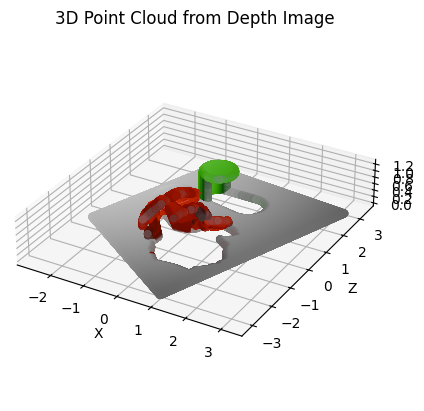

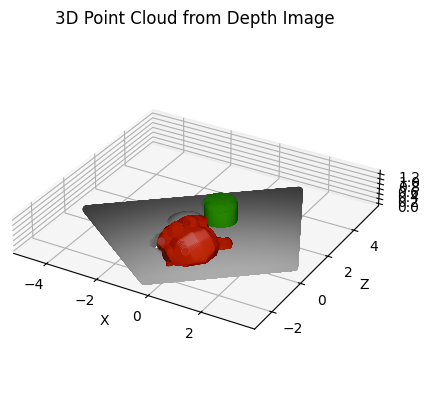

In [11]:
plot(points)
plot(points2)

In [4]:
focalLength = 580.25781
cameraXYZ = -1 * np.array([0, 0, 0])
cameraXYZ[1] = -1 * cameraXYZ[1]
cameraEuler = [0, 0, 0] # Camera orientation as Euler angles (in radians)

depthImage = "../shoeDepth.png"
depthImageArray = np.array(cv2.imread(depthImage))
colorImage = "../shoeColor.jpg"
colorImageArray = np.array(cv2.imread(colorImage))

# Call the function with an example depth image file
points3 = depthToWorld(focalLength, cameraXYZ, cameraEuler, depthImageArray, colorImageArray)

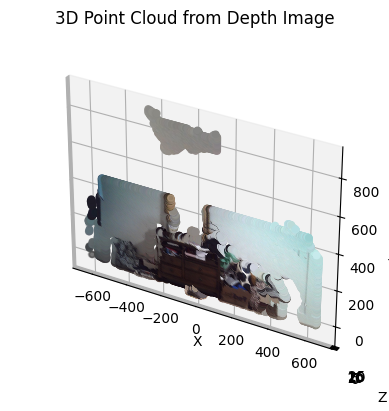

In [36]:
points3Modify = np.copy(points3)
points3Modify[:, 0] *= 100
points3Modify[:, 1] *= 100
points3Modify[:, 2] *= -1
plot(points3Modify)

In [19]:
xSize = 600
ySize = 600
scale = 5
mapPoints2 = np.zeros((xSize, ySize, 3))
flatten(xSize, ySize, scale, points3, mapPoints2)
cv2.imwrite('testMap2.jpg', mapPoints2.get())

True